In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Input, GlobalAveragePooling2D
import matplotlib.pyplot as plt



11490434/11490434 [==============================] - 1s 0us/step


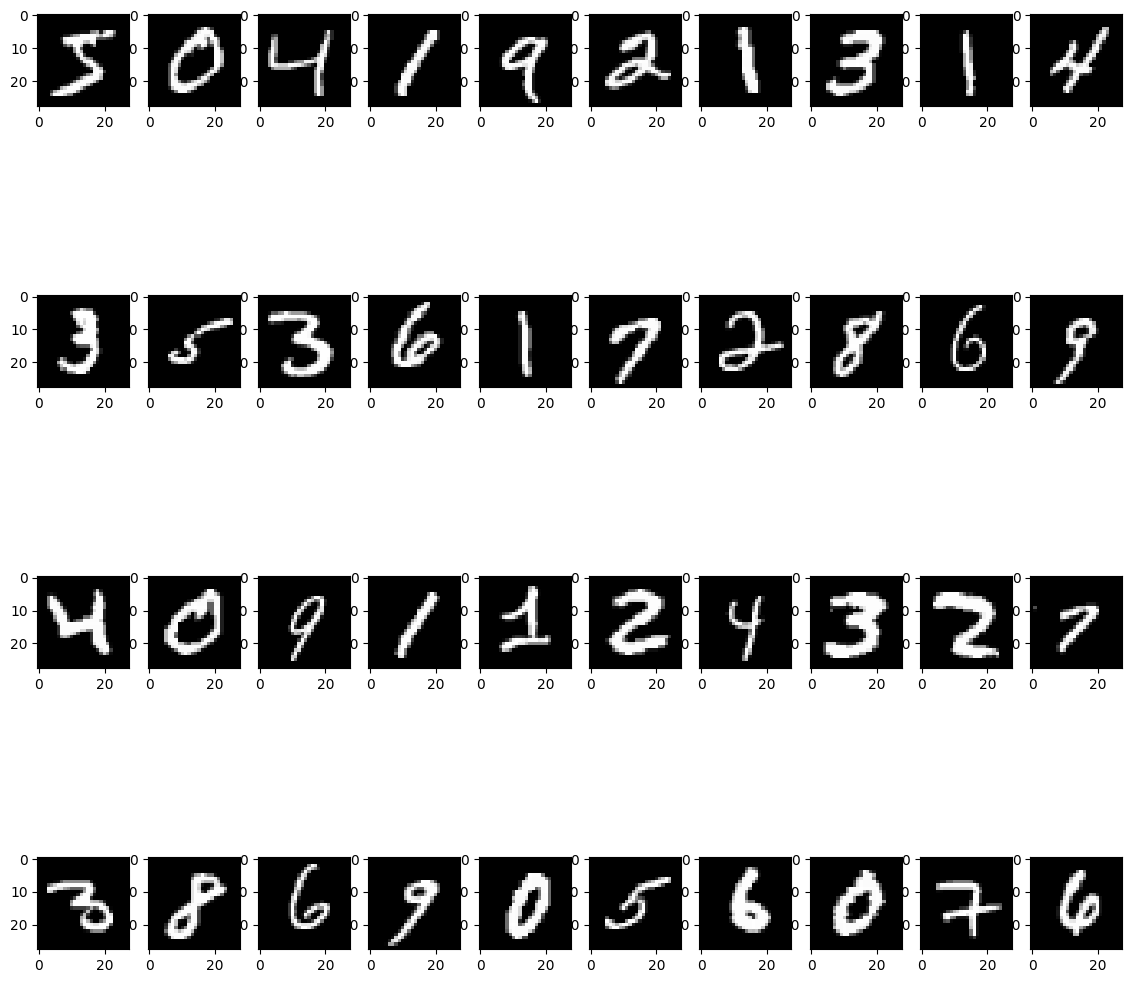

In [ ]:
# MNIST veri setinin yüklenmesi
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Veri görselleştirme
plt.figure(figsize=(14,14))
x, y = 10, 4
for i in range(40):
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i], cmap='gray')
plt.show()



In [ ]:
# Veri ön işleme
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Tek kanallı grayscale görüntüleri 3 kanallı RGB görüntülere dönüştürme
x_train = tf.image.grayscale_to_rgb(tf.convert_to_tensor(x_train))
x_test = tf.image.grayscale_to_rgb(tf.convert_to_tensor(x_test))

# Giriş boyutlarını MobileNet'e uyarlamak için yeniden boyutlandırma
x_train = tf.image.resize(x_train, (96, 96))
x_test = tf.image.resize(x_test, (96, 96))

# Sınıf vektörlerini kategorik hale getirme
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [ ]:
# MobileNet modelinin tanımlanması
base_model = MobileNet(input_shape=(96, 96, 3), include_top=False, weights=None)

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))



In [ ]:
# Modelin derlenmesi
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Modelin eğitilmesi
history = model.fit(x_train, y_train, batch_size=128, epochs=30, verbose=1, validation_data=(x_test, y_test))


Epoch 1/30
469/469 [==============================] - 76s 106ms/step - loss: 0.3552 - accuracy: 0.8820 - val_loss: 7.4333 - val_accuracy: 0.1135
Epoch 2/30
469/469 [==============================] - 48s 103ms/step - loss: 0.0708 - accuracy: 0.9808 - val_loss: 0.1131 - val_accuracy: 0.9683
Epoch 3/30
469/469 [==============================] - 47s 101ms/step - loss: 0.0528 - accuracy: 0.9851 - val_loss: 0.0723 - val_accuracy: 0.9822
Epoch 4/30
469/469 [==============================] - 47s 101ms/step - loss: 0.0435 - accuracy: 0.9871 - val_loss: 0.0620 - val_accuracy: 0.9844
Epoch 5/30
469/469 [==============================] - 47s 101ms/step - loss: 0.0372 - accuracy: 0.9899 - val_loss: 0.0684 - val_accuracy: 0.9819
Epoch 6/30
469/469 [==============================] - 47s 101ms/step - loss: 0.0325 - accuracy: 0.9913 - val_loss: 0.0726 - val_accuracy: 0.9839
Epoch 7/30
469/469 [==============================] - 47s 100ms/step - loss: 0.0325 - accuracy: 0.9912 - val_loss: 0.0830 - val_ac

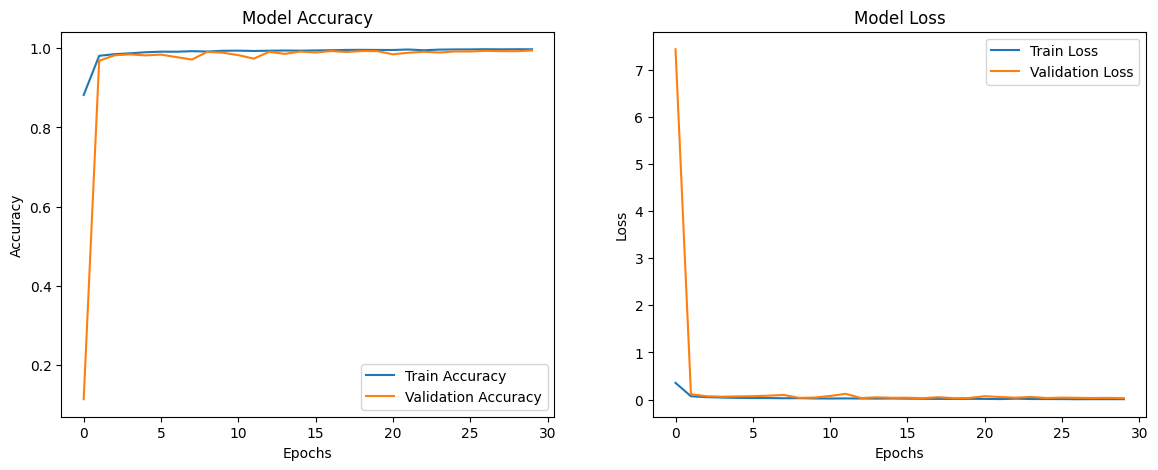

313/313 [==============================] - 4s 13ms/step


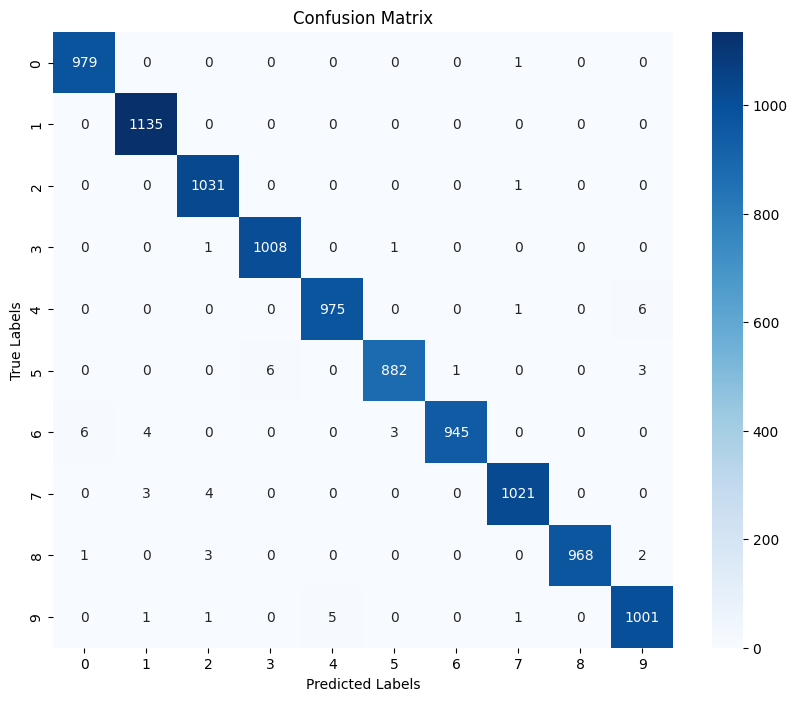